<h1>Pandas</h1>

In [67]:
#installing pandas libraries
!pip install pandas-datareader
!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

Requirement already up-to-date: html5lib==1.0b8 in /opt/anaconda3/lib/python3.7/site-packages (1.0b8)


<h2>Imports</h2>

In [68]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline  # % sign is Jupyter command -> any graph we draw using Matplotlib shoudl show on browser itself
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

UsageError: unrecognized arguments: # % sign is Jupyter command -> any graph we draw using Matplotlib shoudl show on browser itself


<h2>The structure of a dataframe</h2>

In [ ]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

<h3>Accessing columns and rows</h3>

In [ ]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
df

In [ ]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

<h3>Getting column data</h3>

In [ ]:
df['B']  #this is a data series

<h3>Getting row data</h3>

In [ ]:
df.loc['r1']  #this is a data series

<h3>Getting a row by row number</h3>

In [ ]:
df.iloc[0]

<h3>Getting multiple columns<h3>

In [ ]:
df[['B','A']] #Note that the column identifiers are in a LIST

<h3>Getting a specific cell</h3>

In [ ]:
df.loc['r2','B']

In [ ]:
df.loc['r2']['A']   #this is called CHAIN indexing; same as df.loc['r2','A']

<h3>Slicing</h3>

In [ ]:
df.loc['r1':'r2']

In [ ]:
df.loc['r1':'r2','B':'C']

<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

#HTML Table :
<table>
<tr><td>c1</td></tr>
</table>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables from an html page</h4>

Unfortunately, the orginal bloomberg link doesn't work, here we use another website.

In [ ]:
df_list = pd.read_html('https://www.x-rates.com/table/?from=USD&amount=1')
print(len(df_list))

<h4>The page contains two tables</h4>

In [ ]:
df = df_list[0]
df
#type(df)

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [ ]:
df.set_index('US Dollar',inplace=True)
print(df)

<h4>Now we can use .loc to extract specific currency rates</h4>

In [ ]:
df.loc['Euro','1.00 USD']

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [ ]:
eur_usd = df.loc['Euro']['1.00 USD'] #This is chained indexing; this gives a copy
df.loc['Euro']['1.00 USD'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['Euro']['1.00 USD']) #Neither eur_usd, nor the dataframe are changed

In [ ]:
eur_usd = df.loc['Euro','1.00 USD'] #eur_usd points to the value inside the dataframe
df.loc['Euro','1.00 USD'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['Euro']['1.00 USD']) #The dataframe has been correctly updated

<h2>Getting historical stock prices from Yahoo financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Google finance datareader has stopped working because of the charge of Google's policy


In [69]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'yahoo', start, end)


2017-01-01 00:00:00 2020-05-24 22:08:53.240007


In [70]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,143.492233
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,145.268768
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,144.788177
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,145.500534
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,143.886993
...,...,...,...,...,...,...
2020-05-18,122.360001,119.750000,119.879997,121.559998,4207600.0,121.559998
2020-05-19,122.169998,120.139999,121.190002,120.290001,3241100.0,120.290001
2020-05-20,122.470001,120.599998,120.930000,121.379997,3840700.0,121.379997


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [71]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,High,Low,Open,Close,Volume,Adj Close,UP
Date,,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,143.492233,1
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,145.268768,1
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,144.788177,0
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,145.500534,1
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,143.886993,0
...,...,...,...,...,...,...,...
2020-05-18,122.360001,119.750000,119.879997,121.559998,4207600.0,121.559998,1
2020-05-19,122.169998,120.139999,121.190002,120.290001,3241100.0,120.290001,0
2020-05-20,122.470001,120.599998,120.930000,121.379997,3840700.0,121.379997,1


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [72]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,UP
count,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000
mean,145.106541,142.901067,144.044924,143.997679,4.699225e+06,132.346400,0.473623
std,15.205894,15.646057,15.444426,15.398663,2.891108e+06,10.694454,0.499597
min,97.739998,90.559998,94.599998,94.769997,1.193000e+06,93.515839,0.000000
25%,135.940002,134.360001,135.199997,135.270004,3.108900e+06,128.427628,0.000000
50%,144.720001,143.000000,144.100006,143.889999,3.873500e+06,132.444275,0.000000
75%,153.880005,151.880005,152.949997,152.949997,5.193400e+06,137.333893,1.000000
max,182.789993,180.919998,182.000000,181.949997,3.049020e+07,157.394867,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [73]:
df['UP'].sum()/df['UP'].count()

0.47362250879249707

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [74]:
df['Close'].pct_change() #One timeperiod percent change

Date
2017-01-03         NaN
2017-01-04    0.012381
2017-01-05   -0.003309
2017-01-06    0.004920
2017-01-09   -0.011090
                ...   
2020-05-18    0.039152
2020-05-19   -0.010447
2020-05-20    0.009061
2020-05-21   -0.018619
2020-05-22   -0.006128
Name: Close, Length: 853, dtype: float64

In [75]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2020-05-18   -0.055404
2020-05-19   -0.041972
2020-05-20   -0.004021
2020-05-21   -0.021039
2020-05-22   -0.034182
Name: Close, Length: 853, dtype: float64

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [76]:
n=13
df['Close'].pct_change(n).mean()

-0.003229223202463952

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [77]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [78]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2020-05-18    0.031300
2020-05-19    0.025232
2020-05-20    0.019777
2020-05-21    0.014745
2020-05-22    0.006396
Name: Close, Length: 853, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [79]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

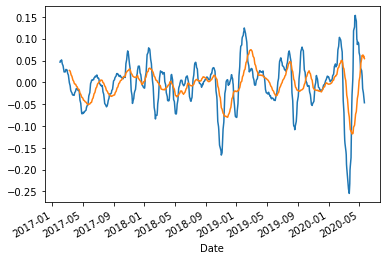

In [80]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [88]:
# Please Note that the historical data of SCTY is not completed so we remove this stock from the list. 
# Change SCTY to SPWR
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','RGSE','SPWR'],'yahoo', start=start,end=end)['Close']

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'RGSE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [89]:
solar_df

Symbols,FSLR,TAN,SPWR,RGSE
Date,,,,
2015-07-01,46.040001,38.840000,27.900000,NaN
2015-07-02,45.169998,38.549999,27.490000,NaN
2015-07-06,44.189999,36.369999,26.830000,NaN
2015-07-07,45.119999,36.099998,26.990000,NaN
2015-07-08,43.270000,33.669998,26.020000,NaN
...,...,...,...,...
2016-05-25,50.560001,22.090000,17.570000,NaN
2016-05-26,49.730000,21.969999,17.100000,NaN
2016-05-27,49.900002,21.959999,17.260000,NaN


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [83]:
rets = solar_df.pct_change()
print(rets)

Symbols         FSLR       TAN      SPWR  RGSE
Date                                          
2015-07-01       NaN       NaN       NaN   NaN
2015-07-02 -0.018897 -0.007467 -0.014695   NaN
2015-07-06 -0.021696 -0.056550 -0.024009   NaN
2015-07-07  0.021045 -0.007424  0.005963   NaN
2015-07-08 -0.041002 -0.067313 -0.035939   NaN
...              ...       ...       ...   ...
2016-05-25  0.001982  0.001360  0.031103   NaN
2016-05-26 -0.016416 -0.005432 -0.026750   NaN
2016-05-27  0.003418 -0.000455  0.009357   NaN
2016-05-31 -0.005010  0.002277  0.015643   NaN
2016-06-01  0.008459  0.004089  0.006275   NaN

[232 rows x 4 columns]


<h4>Let's visualize the relationship between each stock and the ETF</h4>

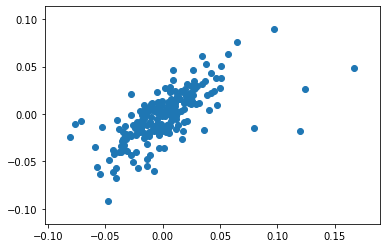

In [84]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

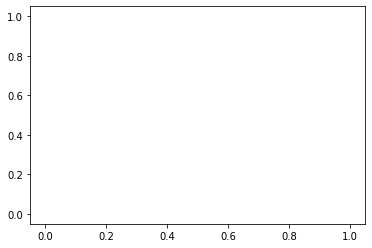

In [86]:
plt.scatter(rets.RGSE,rets.TAN)

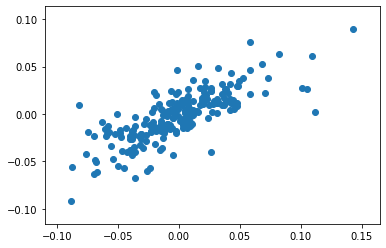

In [87]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [90]:
solar_corr = rets.corr()
print(solar_corr)

Symbols      FSLR       TAN      SPWR  RGSE
Symbols                                    
FSLR     1.000000  0.670287  0.656033   NaN
TAN      0.670287  1.000000  0.773042   NaN
SPWR     0.656033  0.773042  1.000000   NaN
RGSE          NaN       NaN       NaN   NaN


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [98]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


StopIteration: 

<Figure size 432x288 with 1 Axes>

<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [105]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','SPWR']]
X= sm.add_constant(X)   #because model needs an intercept, so add column of ones 
y=solar_df['TAN']
model = sm.OLS(y, X, missing="drop") 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1184.
Date:                Mon, 25 May 2020   Prob (F-statistic):          1.81e-121
Time:                        15:20:33   Log-Likelihood:                -403.76
No. Observations:                 232   AIC:                             813.5
Df Residuals:                     229   BIC:                             823.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6991      0.835     21.188      0.0

<h4>Finally plot the fitted line with the actual y values

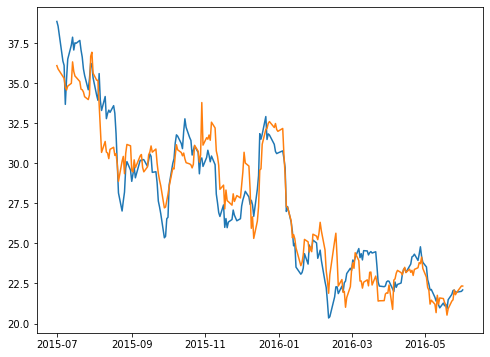

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(results.fittedvalues)